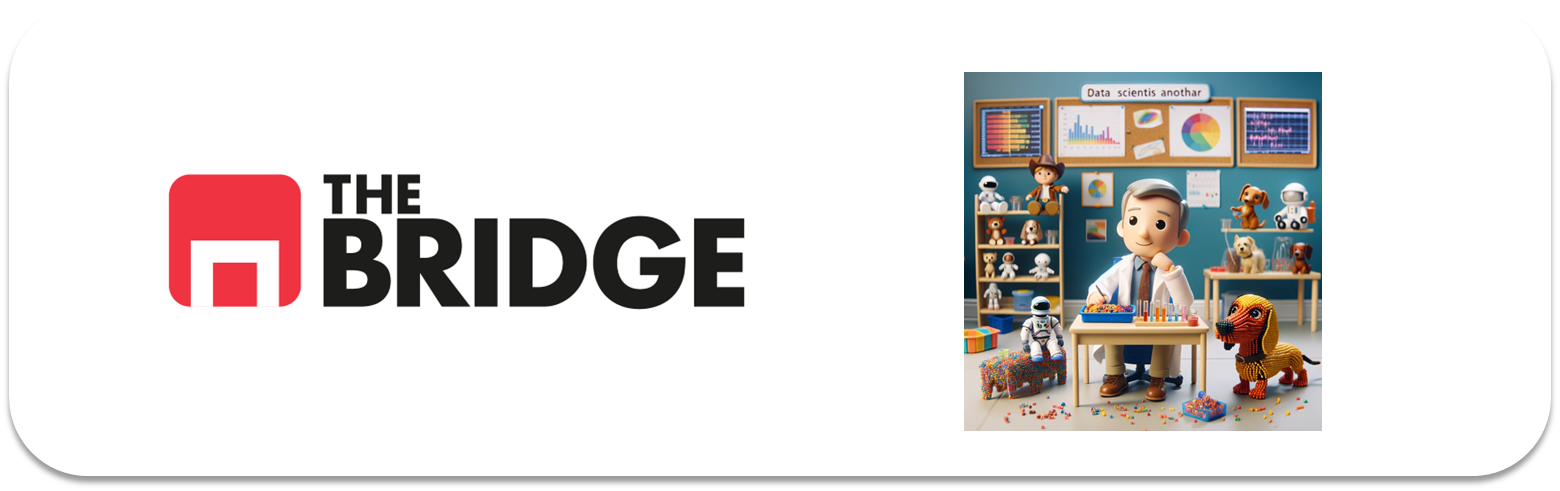

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [542]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import bootcampviztools as bct

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [543]:
df_titanic = sns.load_dataset('titanic')

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [544]:
df = df_titanic.copy()
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [546]:
nan_percentages = df.isna().mean()*100
nan_percentages

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [547]:
df.drop(columns='parch', inplace= True)

In [548]:
print(df.deck.notna().count())

891


In [549]:
df[df.deck.notna()]['deck'].unique()        # Parece ser una columna categórica, pero con tan poco porcentaje de datos, creo que no se puede trabajar. 
# Tal vez tendría sentido localizar los 891 datos que sí tienen este campo y estudiarlos por se parado. O ver si se cumple algún patrós que se puede ampliar a un número mayor.
# Por ahora vamos a quitar esta columna también.

['C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [550]:
df.drop(columns='deck', inplace= True)

In [551]:
# Primero vamos a deshacernos de las filas que tengan más de un nulo, si las hubiera:
df.dropna(thresh = len(df.columns)-1, inplace = True)
df

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [552]:
# Como vemo se nos ha reduecido el número de filas en 2, así que comprobamos la info otra vez para ver de qué columnas se han ido.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   fare         889 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        889 non-null    category
 8   who          889 non-null    object  
 9   adult_male   889 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        889 non-null    object  
 12  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 79.1+ KB


In [553]:
# Con una pequeña visualización del df observamos una posible correlación entre "embarked" y "age"
sel = df[df.embarked.notna()]['embarked'].unique().tolist()
print(sel)
for i in sel:
    part = ((df['embarked'] == i).mean() * 100).round(2)
    cond = (df[df['embarked'] == i]['age'].isna().mean() * 100).round(2)
    print(f'El {part}% de los pasajeros tienen embarked = {i}, y esos, el {cond}% tienen "age" como NaN', end = '\n')
# Observamos un desajuste en cuanto a la recogida de datos de la "age" según el "embarked", habría que estudiar más a qué se debe.

['S', 'C', 'Q']
El 72.44% de los pasajeros tienen embarked = S, y esos, el 13.98% tienen "age" como NaN
El 18.9% de los pasajeros tienen embarked = C, y esos, el 22.62% tienen "age" como NaN
El 8.66% de los pasajeros tienen embarked = Q, y esos, el 63.64% tienen "age" como NaN


In [554]:
cond = (df.loc[df['embarked'] == i, 'age'].mean()).round(2)
cond

28.09

In [555]:
# A la espera de la unidad 2, en la que entraremos en análisis bivariante, lo que vamos a hacer es sustituir los valores faltantes por las medias de cada categoría de "embarked"
# ya que vamos a hacer una operación compleja, vamos a crearnos una función por si la necesitamos luego.
def fillna_media_referida(fillcol, refcol, df):
    '''
    La función sustituye los valores nulos de una columna en función de la media de sus valores no nulos 
    en una seleción de las filas en referencia a otra columna (esperablemente categórica).
    Primero se ingresa la columna a rellenar y luego la columna de referencia. Las dos como str.
    Colocar el nombre del df en tercer lugar.
    '''
    sel = df[df[refcol].notna()][refcol].unique().tolist()              # Aquí obtenemos los valores unicos de la columna para poder hacer la selección
    for i in sel:
        val = (df.loc[df[refcol] == i, fillcol].mean()).round(2)        # Aquí calculamos la media de la selección de valores que no son nulos
        df.loc[df[refcol] == i, fillcol] = df.loc[df[refcol] == i, fillcol].fillna(val)    # Y aquí rellenamos los nulos de esa selección con esa media
        # Importante!!! el implace aquí no sirve, porque solo me modifica la varible local del df, no la global, para hacerlo necesito renombrar la selección que modifico!!!

In [556]:
fillna_media_referida('age','embarked',df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   fare         889 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        889 non-null    category
 8   who          889 non-null    object  
 9   adult_male   889 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        889 non-null    object  
 12  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 79.1+ KB


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


| Columna/Variable | Descripción |
| ---------------- | ----------- |
|survived|Nos indica si la persona murió o sobrevivió|
|pclass|Clase en la que viajaba|
|sex|El sexo sentido|
|age|La edad|
|sibsp|Número de familiares con los que viajaba|
|fare|La Tarifa|
|embarked|Puerto dónde embarcó|
|class|Clase en la que viajaba|
|who|Distingue entre hombre y mujeres adultas y niñ@as|
|adult_male|Empecifica con un bool si es un barón adulto, cosas rancias del pasado en lo que eso importaba|
|embark_town|Puerto dónde embarcó|
|alive|Nos indica si la persona murió o sobrevivió|
|alone|Una columna booleana que nos indica si viajaba sol@|

In [557]:
# No tiene sentido tener columnas con datos repetidos.
# Voy a hacer una función para comprobar la correspondencia entre dos columnas. Si es directa, y además entendemos que el valor es el mismo
def ver_corr_col(c1, c2, df):
    a = df[df[c1].notna()][c1].unique().tolist()       # Sacamos los valores únicos de cada una de las columnas
    b = df[df[c2].notna()][c2].unique().tolist()
    dic = {}
    if len(a) == len(b):
        for i in range(len(a)):
            dic[a[i]] = b[i]             
        for index, row in df.iterrows():        # Verificar que todas las filas coincidan con el diccionario
            valor_c1 = row[c1]
            valor_c2 = row[c2]

            if valor_c1 in dic and dic[valor_c1] != valor_c2:       # Si hay discrepancia, devuelve false
                return (False,'Hay discrepancias de correspondencia')   # El sigiente paso sería ver en qué porcentaje es el que varía. Pero haría falta rehacer la creación del dic
                break                   
    
        return (True,a,b)       # Devuelve True si todos lo valores corresponden. Así como las dos listas de valores únicos.
    else:
        return (False,'Hay diferente número de valores únicos')           # Longitudes de listas diferentes, por lo que no se corresponden


In [558]:
print(ver_corr_col('survived','alive',df))
print(ver_corr_col('embarked','embark_town',df))
print(ver_corr_col('pclass', 'class',df))
print(ver_corr_col('sex', 'who',df))

(True, [0, 1], ['no', 'yes'])
(True, ['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'])
(True, [3, 1, 2], ['Third', 'First', 'Second'])
(False, 'Hay diferente número de valores únicos')


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [559]:
b = df[df.embark_town.notna()]['embark_town'].unique().tolist()
a = df[df.embarked.notna()]['embarked'].unique().tolist()
reemplazos = {}
for i in range(3):
    reemplazos[a[i]] = b[i]
print(reemplazos)
df['embarked'] = df['embarked'].replace(reemplazos)
df.head(20)

{'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}


,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.00,1,7.2500,Southampton,Third,man,True,Southampton,no,False
1,1,1,female,38.00,1,71.2833,Cherbourg,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.00,0,7.9250,Southampton,Third,woman,False,Southampton,yes,True
3,1,1,female,35.00,1,53.1000,Southampton,First,woman,False,Southampton,yes,False
4,0,3,male,35.00,0,8.0500,Southampton,Third,man,True,Southampton,no,True
5,0,3,male,28.09,0,8.4583,Queenstown,Third,man,True,Queenstown,no,True
6,0,1,male,54.00,0,51.8625,Southampton,First,man,True,Southampton,no,True
7,0,3,male,2.00,3,21.0750,Southampton,Third,child,False,Southampton,no,False
8,1,3,female,27.00,0,11.1333,Southampton,Third,woman,False,Southampton,yes,False
9,1,2,female,14.00,1,30.0708,Cherbourg,Second,child,False,Cherbourg,yes,False


In [560]:
# No le veo sentido a que haya dos columnas con la misma información, así que vamos a borrar embark_town.
# Voy a hacer una función para que me refise todas las col de un df y elimine las que guarden correspondencia entre sí.
def drop_col_corr(df, drop_col = True):
    """
    Función para comprobar la correspondencia entre todas las columnas de un dataframe y, en caso de que exista, eliminar la segunda columna.
    Modifica el dataframe directamente y devuelve un diccionario con las columnas dropeadas.

    Args:
        df: Dataframe a comprobar.
        drop_col: Bool. Por defecto es True. Poner false si no queremos que nos elimine las colunmas directamente.

    Returns:
        Diccionario con las columnas dropeadas.
    """
    # Recorremos todas las columnas
    correspondencias = {}
    columnas_disp = df.columns.tolist().copy()
    for c1 in columnas_disp:
        for c2 in columnas_disp:
            if c1 != c2:
                res = ver_corr_col(c1, c2, df)
                if res[0]:
                    correspondencias[c1] = c2
                    # Eliminamos la columna de los iterables
                    columnas_disp.remove(c2)
                    
    # Eliminamos las columnas del dataframe
    if drop_col is True:
        for c1 in correspondencias:
            df.drop(columns=[correspondencias[c1]], inplace=True)
    return correspondencias

In [561]:
print(drop_col_corr(df,False)) # Vemos si hay columnas "correspondientes"
df

{'survived': 'alive', 'pclass': 'class', 'embarked': 'embark_town'}


,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.00,1,7.2500,Southampton,Third,man,True,Southampton,no,False
1,1,1,female,38.00,1,71.2833,Cherbourg,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.00,0,7.9250,Southampton,Third,woman,False,Southampton,yes,True
3,1,1,female,35.00,1,53.1000,Southampton,First,woman,False,Southampton,yes,False
4,0,3,male,35.00,0,8.0500,Southampton,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,13.0000,Southampton,Second,man,True,Southampton,no,True
887,1,1,female,19.00,0,30.0000,Southampton,First,woman,False,Southampton,yes,True
888,0,3,female,29.45,1,23.4500,Southampton,Third,woman,False,Southampton,no,False
889,1,1,male,26.00,0,30.0000,Cherbourg,First,man,True,Cherbourg,yes,True


In [562]:
drop_col_corr(df)
df

,survived,pclass,sex,age,sibsp,fare,embarked,who,adult_male,alone
0,0,3,male,22.00,1,7.2500,Southampton,man,True,False
1,1,1,female,38.00,1,71.2833,Cherbourg,woman,False,False
2,1,3,female,26.00,0,7.9250,Southampton,woman,False,True
3,1,1,female,35.00,1,53.1000,Southampton,woman,False,False
4,0,3,male,35.00,0,8.0500,Southampton,man,True,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,13.0000,Southampton,man,True,True
887,1,1,female,19.00,0,30.0000,Southampton,woman,False,True
888,0,3,female,29.45,1,23.4500,Southampton,woman,False,False
889,1,1,male,26.00,0,30.0000,Cherbourg,man,True,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [563]:

col_names = ['name', 'type', 'prio', 'card', 'card%']
row_names = ['survived', 'who', 'age', 'fare', 'pclass', 'embarked', 'alone']

def crea_df_std(df,col_names,row_names):
    row_types = []
    row_prio = []
    card = df[row_names].nunique()
    card_per = (df[row_names].nunique()/len(df) * 100).round(2)

    for col_name in row_names:
        col_type = df[col_name].dtype
        row_types.append(col_type)
        row_prio.append(3)
    df_std = pd.DataFrame(list(zip(row_names, row_types, row_prio, card, card_per)),columns=col_names)
    return df_std
df_std = crea_df_std(df,col_names,row_names)
df_std

,name,type,prio,card,card%
0,survived,int64,3,2,0.22
1,who,object,3,3,0.34
2,age,float64,3,91,10.24
3,fare,float64,3,247,27.78
4,pclass,int64,3,3,0.34
5,embarked,object,3,3,0.34
6,alone,bool,3,2,0.22


In [564]:
df['survived'] = df['survived'].astype(bool)        # Cambiamos los typos de las columnas que no son los que queremos.

prio_0 = ['survived']
prio_1 = ['who', 'age', 'pclass']
prio_2 = ['fare', 'embarked']
prio = {'0': prio_0, '1': prio_1, '2': prio_2}

for i, j in prio.items():
    for k in j:
        df_std.loc[df_std['name'] == k, 'prio'] = int(i)
df_std

,name,type,prio,card,card%
0,survived,int64,0,2,0.22
1,who,object,1,3,0.34
2,age,float64,1,91,10.24
3,fare,float64,2,247,27.78
4,pclass,int64,1,3,0.34
5,embarked,object,2,3,0.34
6,alone,bool,3,2,0.22


In [565]:
df_std["class"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_std.loc[df_std.card == 2, "class"] = "Binaria"
df_std.loc[df_std["card"] > 10, "class"] ="Numerica Discreta"
df_std.loc[df_std["card%"] > 30, "class"] = "Numerica Continua"
df_std

,name,type,prio,card,card%,class
0,survived,int64,0,2,0.22,Binaria
1,who,object,1,3,0.34,Categorica
2,age,float64,1,91,10.24,Numerica Discreta
3,fare,float64,2,247,27.78,Numerica Discreta
4,pclass,int64,1,3,0.34,Categorica
5,embarked,object,2,3,0.34,Categorica
6,alone,bool,3,2,0.22,Binaria


### #2.1 Categóricas

In [566]:
cat = df_std[df_std['class'].isin(['Binaria', 'Categorica'])]['name'].tolist()   # Estas son las columnas categóricas
cat

['survived', 'who', 'pclass', 'embarked', 'alone']

In [567]:
df_std['mode'] = '_'
for c in cat:
    print(f"Para {c}")
    df_prop = (df[c].value_counts()/len(df)*100).round(2)
    moda = df[c].mode().iloc[0]
    df_std.loc[df_std.name == c, "mode"] = moda
    # print(type(df[c].mode().iloc[0]))
    print(df_prop)
    print("\n")
df_std

Para survived
survived
False    61.75
True     38.25
Name: count, dtype: float64


Para who
who
man      60.40
woman    30.26
child     9.34
Name: count, dtype: float64


Para pclass
pclass
3    55.23
1    24.07
2    20.70
Name: count, dtype: float64


Para embarked
embarked
Southampton    72.44
Cherbourg      18.90
Queenstown      8.66
Name: count, dtype: float64


Para alone
alone
True     60.18
False    39.82
Name: count, dtype: float64




,name,type,prio,card,card%,class,mode
0,survived,int64,0,2,0.22,Binaria,False
1,who,object,1,3,0.34,Categorica,man
2,age,float64,1,91,10.24,Numerica Discreta,_
3,fare,float64,2,247,27.78,Numerica Discreta,_
4,pclass,int64,1,3,0.34,Categorica,3
5,embarked,object,2,3,0.34,Categorica,Southampton
6,alone,bool,3,2,0.22,Binaria,True


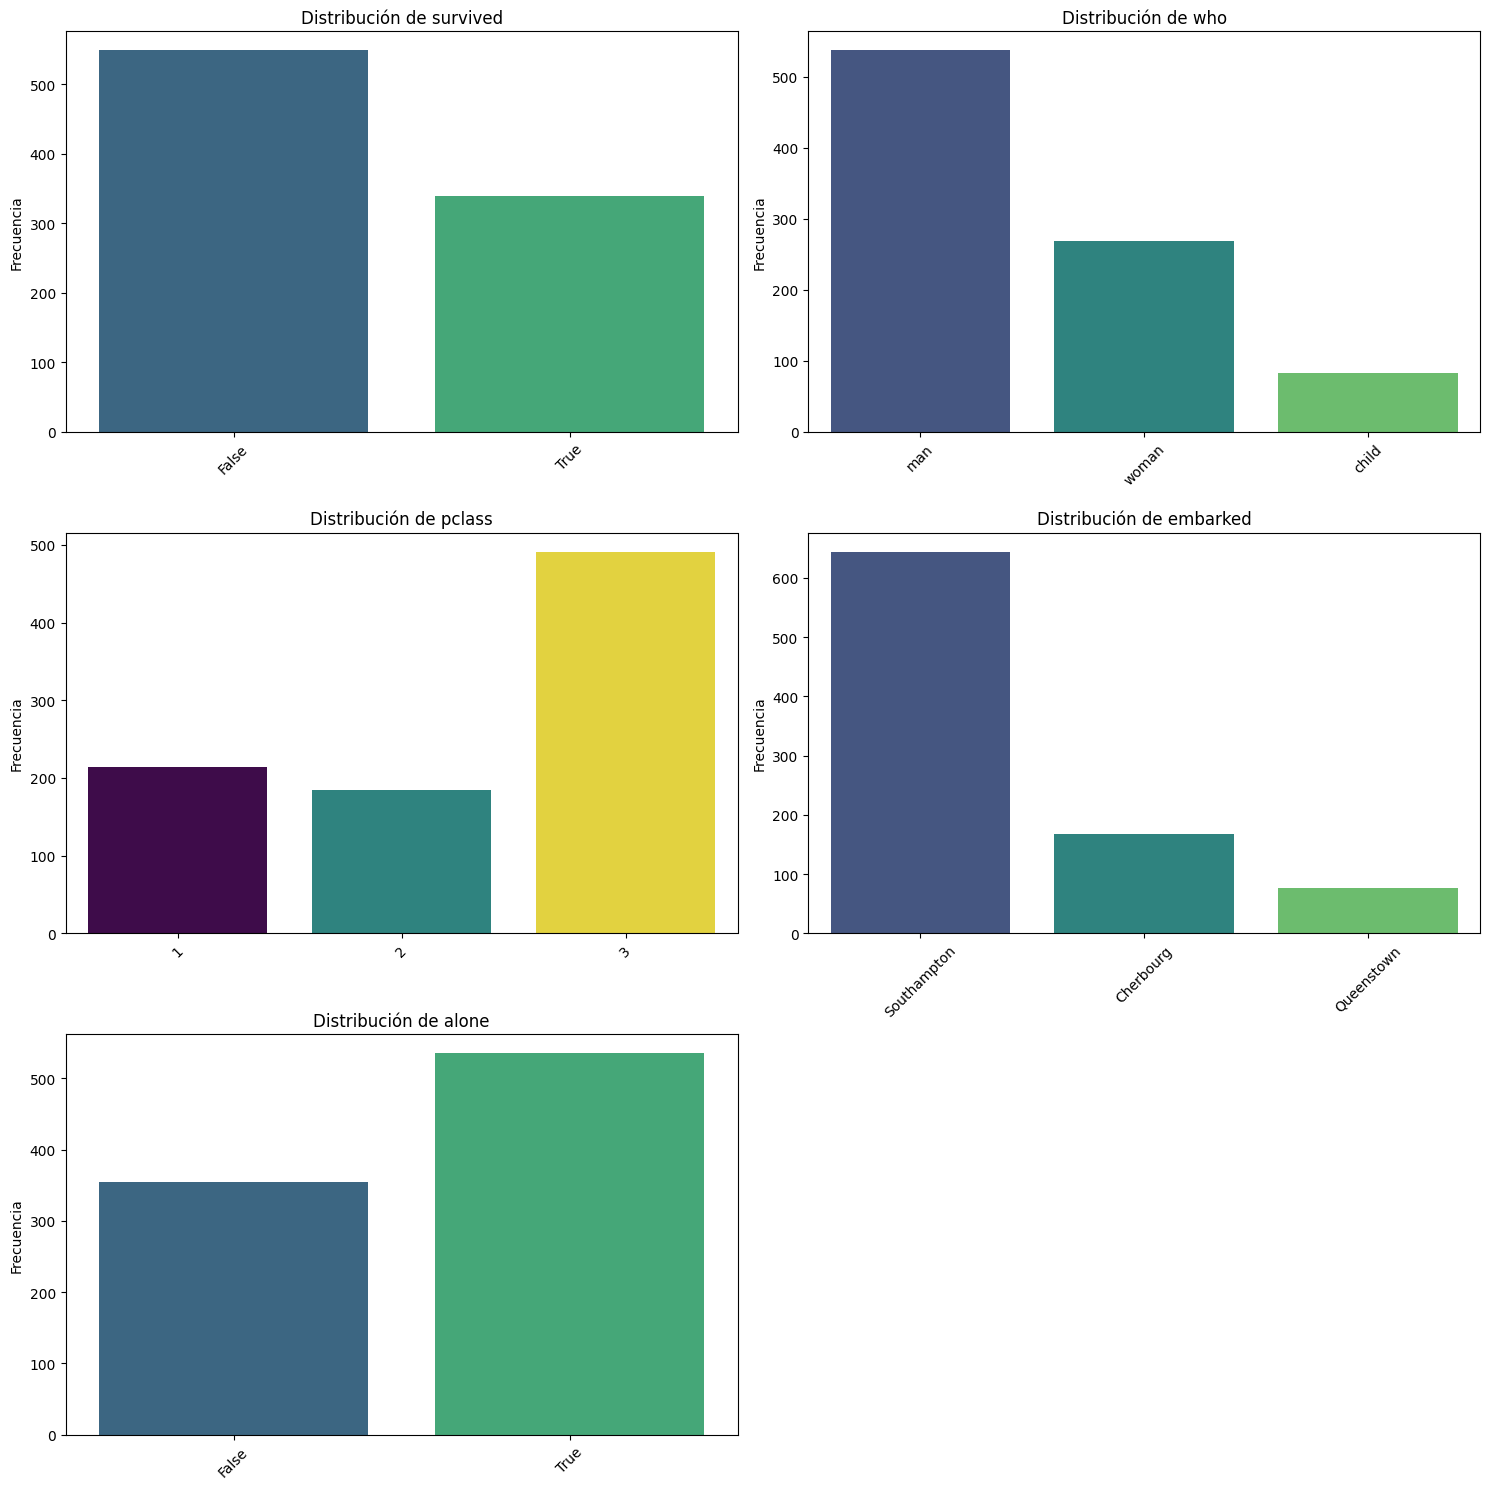

In [568]:
bct.pinta_distribucion_categoricas(df,cat)

Las gráficas nos ayudan a ver con claridad la distribución de valores en las columnas de estudio. En cuanto a las columnas categóricas podemos decir que lo normal es que la personas que iban en el titanic fallecieran, fueran hombres, de terecera clase, embarcases en Southampton y viajases solos.

### #2.2 Numéricas

In [569]:
num = df_std[df_std['class'].isin(['Numerica Discreta', 'Numerica Continua'])]['name'].tolist()   # Estas son las columnas numéricas
num

['age', 'fare']

In [570]:
df['age'].describe()   

count    889.000000
mean      29.587019
std       12.975747
min        0.420000
25%       22.000000
50%       29.450000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [571]:
df['fare'].describe()  

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

(2, 2)


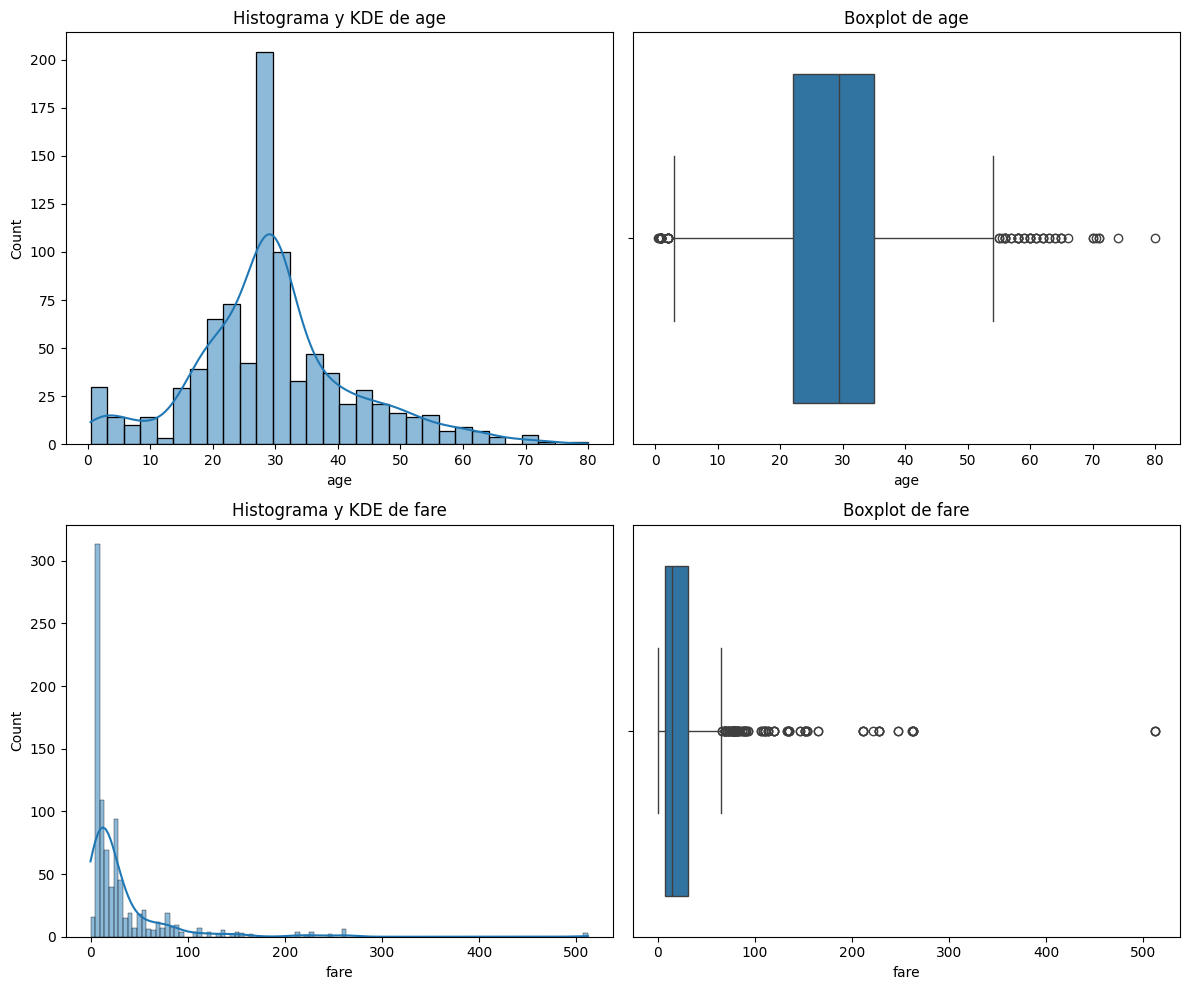

In [573]:
bct.plot_combined_graphs(df,num)

En la columna Edad vemos como podría corresponderse con la pirámide de población de la época. Habría que compararlo. La distribución de los valores es medianamente simétrica. Hay dispersión de valores a lo largo de todas las edades, con una mayor concentración en torno a lo que sería la media y la mediana. No considero que haya outlayers ya que los valores más allá de los cuartiles siguen la distribución esperada.

En la columna de Fare vemos una gran con concentración de rentas bajas. Y lo que podría ser un outlayer que podría estar edulcorándonos las variables de tendencia central. Fila que eliminaría.